<a href="https://colab.research.google.com/github/deepintomlf/mlfbook/blob/master/Chapter2_Supervised_Learning/section2.2_from_regression_to_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Section 2.2 - From Regression to Classification**

This notebook contains all demo codes in Section 2.2.

### **Pre-process MNIST Dataset**

In [42]:
import numpy as np
from keras.datasets import mnist 

# Import MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
[n_samples_train, width, height] = np.shape(x_train)
[n_samples_test, width, height] = np.shape(x_test)

X_train = x_train.reshape([n_samples_train, width*height]) # flattens out individual 2D array/ image
X_test =x_test.reshape([n_samples_test, width*height])
Y_train = (y_train==8)      # use number 8 for training and testing
Y_test= (y_test==8)

60000
10000


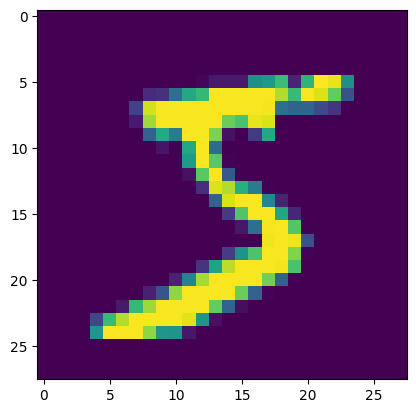

In [43]:
import matplotlib.pyplot as plt
print(n_samples_train)  # 60000 images of integers between 0-9 for training
print(n_samples_test)   # 10000 images for testing
# print(x_train[0,:,:])
plt.imshow( x_train[0,:,:]) # show the first training image

False    54149
True      5851
Name: count, dtype: int64


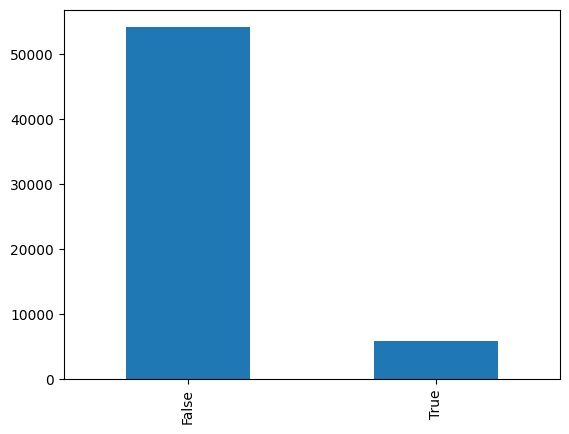

In [44]:
import pandas as pd

y_pd = pd.Series(Y_train)
count_y = y_pd.value_counts().sort_index()
count_y.plot(kind='bar')
print(count_y)      # 5851 #8's in the training set

False    9026
True      974
Name: count, dtype: int64


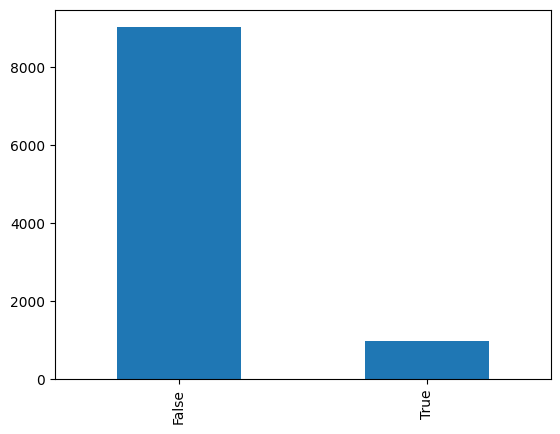

In [45]:
y_test_pd = pd.Series(Y_test)
count_y_test = y_test_pd.value_counts().sort_index()
count_y_test.plot(kind='bar')
print(count_y_test)     # 974 #8's in the testing set

### **Implement Logistic Regression Model**

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # normalize X values from training set
X_test_scaled = scaler.transform(X_test)    # normalize X values from testing set

model = LogisticRegression(random_state=0, solver='lbfgs')
clf = model.fit(X_train_scaled, Y_train)

# Predict labels
y_train_est = clf.predict(X_train_scaled)
y_train_prob_est = clf.predict_proba(X_train_scaled)

# Predict probabilities
y_test_est = clf.predict(X_test_scaled)
y_test_prob_est = clf.predict_proba(X_test_scaled)

In [47]:
temp = pd.DataFrame(y_train_prob_est)
temp.columns = ['class 1 (non 8)', 'class 2 (digit 8)']
print('conditional probability estimator')
temp.head(15)

conditional probability estimator


,class 1 (non 8),class 2 (digit 8)
0,0.999983,1.683606e-05
1,0.999763,2.366541e-04
2,0.999995,5.410983e-06
3,0.956594,4.340560e-02
4,0.996939,3.060656e-03
5,0.992021,7.979141e-03
6,0.992166,7.833563e-03
7,0.929717,7.028272e-02
8,0.992712,7.287908e-03
9,0.996047,3.952613e-03


In [48]:
temp = pd.Series(y_test_prob_est[1])
temp.head()

0    1.000000e+00
1    3.063901e-09
dtype: float64

In [49]:
temp1 = pd.DataFrame(y_train_est)
temp1.columns = ['class 1 (non 8)']	
print('estimated output')
temp1.head(15)

estimated output


,class 1 (non 8)
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


### **Output Confusion Matrix**

In [50]:
from sklearn.metrics import confusion_matrix

# Y_test is a binary vector of the actual class label with dim (N, 1) where N is the number of samples;
# y_test_est is a binary vector of the estimated class label with dim (N, 1).
cm = confusion_matrix(Y_test, y_test_est)
print('confusion matrix is {}'.format(cm))

confusion matrix is [[8883  143]
 [ 248  726]]


### **Compute Accuracy, Precision and Recall**

In [51]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(Y_train, y_train_est)
acc_test = accuracy_score(Y_test, y_test_est)
print('accuracy of the train set= {}'.format(acc_train))
print('accuracy of the testing set= {}'.format(acc_test))

accuracy of the train set= 0.96235
accuracy of the testing set= 0.9609


In [52]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(Y_test, y_test_est)
recall = recall_score(Y_test, y_test_est)
print(precision)
print(recall)

0.8354430379746836
0.7453798767967146


### **Plot PR Curve**

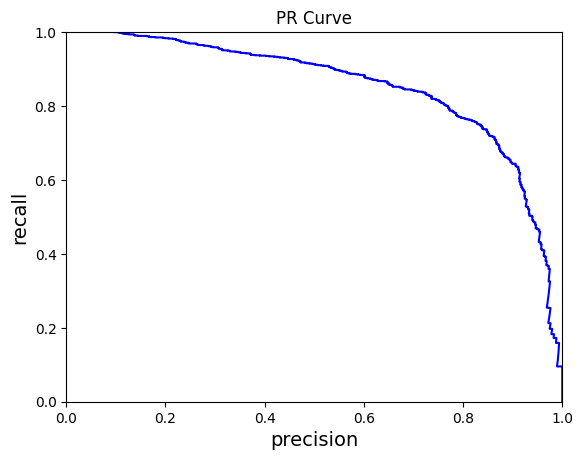

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(Y_test, y_test_prob_est[:,1])
plt.plot(precisions, recalls, 'b')
plt.xlabel('precision', fontsize=14)
plt.ylabel('recall', fontsize=14)
plt.title('PR Curve')
plt.axis([0, 1, 0, 1])
plt.savefig('binary_classfication_PR_curve.png')

### **Plot ROC Curve**

roc auc score = 0.9644631457104754


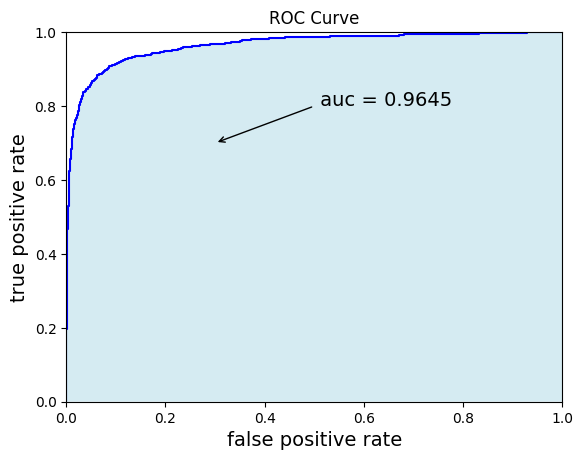

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

fps, tps, thresholds = roc_curve(Y_test, y_test_prob_est[:,1])
roc_auc_score_train = roc_auc_score(Y_test, y_test_prob_est[:,1])

print('roc auc score = {}'.format(roc_auc_score_train))

plt.plot(fps, tps, 'b')
plt.xlabel('false positive rate', fontsize=14)
plt.ylabel('true positive rate', fontsize=14)
plt.title('ROC Curve')
plt.axis([0, 1, 0, 1])
plt.fill_between(fps, 0, tps, facecolor='lightblue', alpha=0.5)
plt.text( 0.5, 0.8, ' auc = '+str(round(roc_auc_score_train, 4)), fontsize=14)
plt.annotate("", xy=(0.3, 0.7), xycoords='data', xytext=(0.5, 0.8), textcoords='data', 
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), )
plt.savefig('binary_classification_ROC_curve.png')

## **Ensemble Model**

### **Define Weak Learners and Ensemble Models**

In [55]:
import numpy as np

def weak_learner():
    ''' Define a weak classifier with 55% accuracy '''
    n = np.random.randint(0, 100)
    return (2 if n >=45 else 1)
     
def majority_voting(results:list):
    ''' Majority voting method '''
    return (2 if results.count(2) >= results.count(1) else 1)

def ensemble_model(learner, num_learners=1000):
    ''' Define ensemble model with 1,000 weak learners '''
    all_res = []
    for i in range(num_learners):
        res = learner()
        all_res.append(res)
    return majority_voting(all_res)

### **Approximate accuracy of weak learners and ensemble models**

In [56]:
# Simulate 10, 000 samples
num_samples = 10000
all_weak_learner_res = []
all_ensemble_model_res = []

for i in range(num_samples):
    weak_learner_res = weak_learner()
    ensemble_model_res = ensemble_model(weak_learner)
    all_weak_learner_res.append(weak_learner_res)
    all_ensemble_model_res.append(ensemble_model_res)

# Calculate accuracy
weak_learner_acc, ensemble_model_acc = all_weak_learner_res.count(2)/num_samples, all_ensemble_model_res.count(2)/num_samples

# View simulation results
print('The accuracy of the weak learner is only {}'.format(weak_learner_acc)) 
print('The ensemble model achieves accuracy as high as {}'.format(ensemble_model_acc))

The accuracy of the weak learner is only 0.548
The ensemble model achieves accuracy as high as 0.9993


### **Accuracy of Ensemble Models with Different Number of Learners**

In [57]:
num_learners = np.arange(1,1000,10)
all_acc = []

for i in num_learners:
    np.random.seed(0)
    num_samples = 1000
    all_ensemble_model_res = []
    for j in range(num_samples):
        ensemble_model_res = ensemble_model(weak_learner, i)
        all_ensemble_model_res.append(ensemble_model_res)
        ensemble_model_acc = all_ensemble_model_res.count(2)/num_samples
    all_acc.append(ensemble_model_acc)

Text(0, 0.5, 'Accuracy')

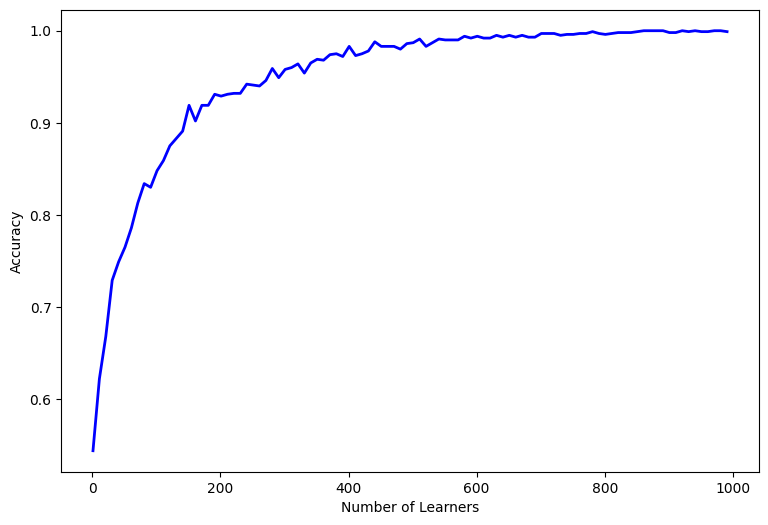

In [58]:
import matplotlib.pyplot as plt

# Plot accuracy curve
plt.figure(figsize = (9, 6))
plt.plot(num_learners, all_acc, 'b', linewidth = 2)
plt.xlabel('Number of Learners')
plt.ylabel('Accuracy')